# Practical Text Classification With Python and Keras

## Data Set

In [1]:
import string
import time
from collections import defaultdict
import numpy as np
import pandas as pd

dataEF = pd.read_csv('text_emotion.csv')
print( len(dataEF["content"].unique()) )
dataEF.head()

39827


,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [2]:
from sklearn.model_selection import train_test_split

sentences = dataEF['content'].values
y = dataEF['sentiment'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.25, random_state=1000)


Using the CountVectorizer to vectorize sentences. It takes the words of each sentence and creates a vocabulary of all the unique words in the sentences.

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)
X_train

<30000x39357 sparse matrix of type '<class 'numpy.int64'>'
	with 356918 stored elements in Compressed Sparse Row format>

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)

X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

print(X_train.shape)
print(y_train.shape)
print(type(X_train))
print(type(y_train))

#print(X_train[:3])
#print(y_train2[:3])
print(np.unique(y_train))
print(np.unique(y_test))

(30000, 39357)
(30000,)
<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


We use the logistic regression which is a simple yet powerful linear model that is mathematically speaking in fact a form of regression between 0 and 1 based on the input feature vector.

In [5]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)

print("Accuracy:", score)

Accuracy: 0.3414


/home/julien/anaconda3/envs/machinelearning/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Using Neural Networks

### First Keras Model
We need to know the input dimension of our feature vectors. This happens only in the first layer since the following layers can do automatic shape inference.

In [6]:
from keras.models import Sequential
from keras import layers

input_dim = X_train.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(13, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))

print(X_train.shape[1])

39357


Before we start with the training of the model, we need to configure the learning process. This is done with the .compile() method. This method specifies the optimizer and the loss function.

In [7]:
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                511654    
_________________________________________________________________
dense_1 (Dense)              (None, 13)                182       
Total params: 511,836
Trainable params: 511,836
Non-trainable params: 0
_________________________________________________________________


We want to run fit() for 20 epochs to be able to see how the training loss and accuracy are changing after each epoch.

In [8]:
history = model.fit(X_train, y_train,
                    epochs=20,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)

Epoch 1/20
3000/3000 [==============================] - 34s 11ms/step - loss: 2.0119 - accuracy: 0.3199 - val_loss: 1.9098 - val_accuracy: 0.3531
Epoch 2/20
3000/3000 [==============================] - 37s 12ms/step - loss: 1.6109 - accuracy: 0.4600 - val_loss: 1.9275 - val_accuracy: 0.3518
Epoch 3/20
3000/3000 [==============================] - 38s 13ms/step - loss: 1.2298 - accuracy: 0.6070 - val_loss: 2.0517 - val_accuracy: 0.3350
Epoch 4/20
3000/3000 [==============================] - 37s 12ms/step - loss: 0.9004 - accuracy: 0.7234 - val_loss: 2.2485 - val_accuracy: 0.3238
Epoch 5/20
3000/3000 [==============================] - 34s 11ms/step - loss: 0.6583 - accuracy: 0.8047 - val_loss: 2.4777 - val_accuracy: 0.3097
Epoch 6/20
3000/3000 [==============================] - 32s 11ms/step - loss: 0.4919 - accuracy: 0.8566 - val_loss: 2.7246 - val_accuracy: 0.2861
Epoch 7/20
3000/3000 [==============================] - 33s 11ms/step - loss: 0.3820 - accuracy: 0.8871 - val_loss: 2.9792 -

We call clear_session() before training the model again:

In [9]:
from keras.backend import clear_session
clear_session()

Let’s evaluate the accuracy of the model.

In [10]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.9814
Testing Accuracy:  0.2512


We can observe some likely overfitting

Helper function to visualize the loss and accuracy for the training and testing data based on the History callback:

In [11]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

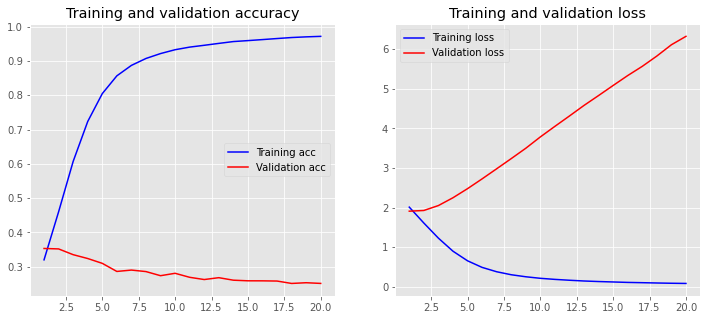

In [12]:
plot_history(history)

## Word Embeddings

Using the Tokenizer utility class which can vectorize a text corpus into a list of integers. Each integer maps to a value in a dictionary that encodes the entire corpus, with the keys in the dictionary being the vocabulary terms themselves.

In [13]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index

print(sentences_train[2])
print(X_train[2])

A very exciting week
[4, 128, 983, 133]


Each text sequence has in most cases different length of words. To counter this, we use pad_sequence() which simply pads the sequence of words with zeros.

In [14]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[0, :])

[4327   58  609    2  964    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


## Keras Embedding Layer

We use the Embedding Layer of Keras which takes the previously calculated integers and maps them to a dense vector of the embedding.

We take the output of the embedding layer and plug it into a Dense layer. In order to do this we have to add a Flatten layer in between that prepares the sequential input for the Dense layer:


In [15]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(13, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           2000550   
_________________________________________________________________
flatten (Flatten)            (None, 5000)              0         
_________________________________________________________________
dense (Dense)                (None, 13)                65013     
_________________________________________________________________
dense_1 (Dense)              (None, 13)                182       
Total params: 2,065,745
Trainable params: 2,065,745
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
3000/3000 [==============================] - 150s 50ms/step - loss: 2.0515 - accuracy: 0.2893 - val_loss: 1.9685 - val_accuracy: 0.3209
Epoch 2/30
3000/3000 [==============================] - 148s 49ms/step - loss: 1.8198 - accuracy: 0.3882 - val_loss: 1.9717 - val_accuracy: 0.3309
Epoch 3/30
3000/3000 [==============================] - 153s 51ms/step - loss: 1.5832 - accuracy: 0.4825 - val_loss: 2.1140 - val_accuracy: 0.3093
Epoch 4/30
3000/3000 [==============================] - 145s 48ms/step - loss: 1.3192 - accuracy: 0.5700 - val_loss: 2.3596 - val_accuracy: 0.2975
Epoch 5/30
3000/3000 [==============================] - 145s 48ms/step - loss: 1.0737 - accuracy: 0.6554 - val_loss: 2.6949 - val_accuracy: 0.2879
Epoch 6/30
3000/3000 [==============================] - 150s 50ms/step - loss: 0.8723 - accuracy: 0.7296 - val_loss: 3.1211 - val_accuracy: 0.2736
Epoch 7/30
3000/3000 [==============================] - 148s 49ms/step - loss: 0.7127 - accuracy: 0.7839 - val_loss: 3

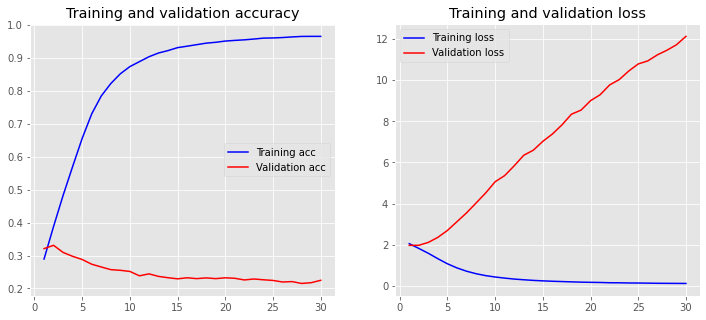

In [16]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

Another way to work with embeddings is by using a MaxPooling1D/AveragePooling1D or a GlobalMaxPooling1D/GlobalAveragePooling1D layer after the embedding.

In [17]:
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(13, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 50)           2000550   
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 13)                663       
_________________________________________________________________
dense_3 (Dense)              (None, 13)                182       
Total params: 2,001,395
Trainable params: 2,001,395
Non-trainable params: 0
_________________________________________________________________


We run only 30 epochs due to time constraints:

Epoch 1/30
3000/3000 [==============================] - 117s 39ms/step - loss: 2.0529 - accuracy: 0.2854 - val_loss: 1.9546 - val_accuracy: 0.3324
Epoch 2/30
3000/3000 [==============================] - 118s 39ms/step - loss: 1.8684 - accuracy: 0.3617 - val_loss: 1.9017 - val_accuracy: 0.3507
Epoch 3/30
3000/3000 [==============================] - 121s 40ms/step - loss: 1.7733 - accuracy: 0.3970 - val_loss: 1.9030 - val_accuracy: 0.3547
Epoch 4/30
3000/3000 [==============================] - 120s 40ms/step - loss: 1.6881 - accuracy: 0.4270 - val_loss: 1.9338 - val_accuracy: 0.3428
Epoch 5/30
3000/3000 [==============================] - 120s 40ms/step - loss: 1.6045 - accuracy: 0.4571 - val_loss: 1.9887 - val_accuracy: 0.3409
Epoch 6/30
3000/3000 [==============================] - 122s 41ms/step - loss: 1.5252 - accuracy: 0.4858 - val_loss: 2.0595 - val_accuracy: 0.3307
Epoch 7/30
3000/3000 [==============================] - 120s 40ms/step - loss: 1.4495 - accuracy: 0.5121 - val_loss: 2

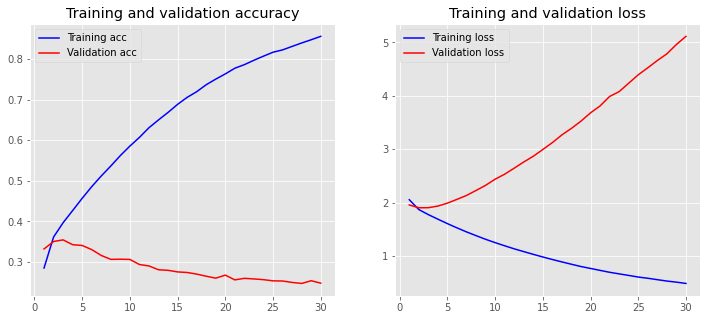

In [18]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


 * Quelle doit être le format de donnée en entrée de la couche Embedding ?
  * Liste de vecteurs 'dense'. Params : input dimension ; output dimension ; input length.
 * Expliquer ce que fait et le rôle de la fonction pad_sequence ? Quels sont les paramètres important de cette fonction ?
  * Formatte les sequences pour qu'elles aient la meme taille.
  * Params : 'sequences', liste de sequences ; 'maxlen', taille max des sequences ; 'padding', padding avec 0 en pre (avant) ou post (apres)
 * Expliquer ce que fait et le rôle de la couche GlobalMaxPool1d ? Quels sont les paramètre important ? Quelles alternatives existent ?
  * "Global max pooling operation for 1D temporal data."
  * params : 
  * Alternatives : MaxPool1D, AveragePooling1D, GlobalAveragePooling1D, ou Flatten().


#### Using Word Embedding matrix (matrix embedding challenge)

In [34]:
embeddings = layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen
                             ).get_weights()[0]

embeddings

IndexError: list index out of range

## Pretrained Word Embeddings
We use a precomputed embedding space that utilizes a much larger corpus. It is possible to precompute word embeddings by simply training them on a large corpus of text. We'll use GloVe (Global Vectors for Word Representation) developed by the Stanford NLP Group.

Since we have only a limited number of words in our vocabulary, we can skip most of the 40000 words in the pretrained word embeddings:

In [19]:
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix


We use the create_embedding_matrix() function to retrieve the embedding matrix:

In [37]:
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
    './glove_word_embeddings/glove.6B.50d.txt',
    tokenizer.word_index, embedding_dim)

A quick look at how many of the embedding vectors are nonzero:

In [38]:
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.4878658368948539

Let’s have a look at the performance when using the GlobalMaxPool1D layer:

In [40]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=False))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 100, 50)           2000550   
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                3264      
_________________________________________________________________
dense_13 (Dense)             (None, 13)                845       
Total params: 2,004,659
Trainable params: 4,109
Non-trainable params: 2,000,550
_________________________________________________________________


Training the model:

Epoch 1/30
3000/3000 [==============================] - 41s 14ms/step - loss: 2.1020 - accuracy: 0.2635 - val_loss: 2.0693 - val_accuracy: 0.2802
Epoch 2/30
3000/3000 [==============================] - 38s 13ms/step - loss: 2.0506 - accuracy: 0.2866 - val_loss: 2.0513 - val_accuracy: 0.2914
Epoch 3/30
3000/3000 [==============================] - 40s 13ms/step - loss: 2.0405 - accuracy: 0.2893 - val_loss: 2.0621 - val_accuracy: 0.2853
Epoch 4/30
3000/3000 [==============================] - 39s 13ms/step - loss: 2.0321 - accuracy: 0.2926 - val_loss: 2.0466 - val_accuracy: 0.2869
Epoch 5/30
3000/3000 [==============================] - 37s 12ms/step - loss: 2.0253 - accuracy: 0.2953 - val_loss: 2.0525 - val_accuracy: 0.2840
Epoch 6/30
3000/3000 [==============================] - 40s 13ms/step - loss: 2.0204 - accuracy: 0.2961 - val_loss: 2.0531 - val_accuracy: 0.2915
Epoch 7/30
3000/3000 [==============================] - 41s 14ms/step - loss: 2.0154 - accuracy: 0.2977 - val_loss: 2.0388 -

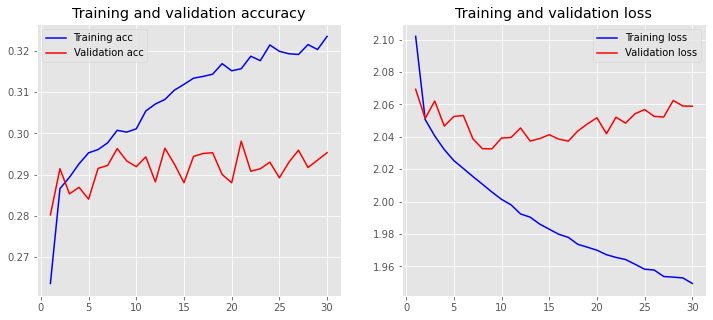

In [41]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

We can observe better result with the validation set when using pretrained word embedding. Increasing the number of units (from 13 to 64) does not meaningfully improve the results,

Let’s now see how this performs if we allow the embedding to be trained by using trainable=True:

In [24]:
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(13, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 50)           2000550   
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 13)                663       
_________________________________________________________________
dense_7 (Dense)              (None, 13)                182       
Total params: 2,001,395
Trainable params: 2,001,395
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
3000/3000 [==============================] - 110s 37ms/step - loss: 2.1326 - accuracy: 0.2523 - val_loss: 2.0295 - val_accuracy: 0.3096
Epoch 2/30
3000/3000 [==============================] - 111s 37ms/step - loss: 1.9412 - accuracy: 0.3377 - val_loss: 1.9467 - val_accuracy: 0.3390
Epoch 3/30
3000/3000 [==============================] - 111s 37ms/step - loss: 1.8514 - accuracy: 0.3730 - val_loss: 1.9346 - val_accuracy: 0.3422
Epoch 4/30
3000/3000 [==============================] - 112s 37ms/step - loss: 1.7892 - accuracy: 0.3961 - val_loss: 1.9368 - val_accuracy: 0.3380
Epoch 5/30
3000/3000 [==============================] - 114s 38ms/step - loss: 1.7367 - accuracy: 0.4154 - val_loss: 1.9477 - val_accuracy: 0.3373
Epoch 6/30
3000/3000 [==============================] - 113s 38ms/step - loss: 1.6896 - accuracy: 0.4301 - val_loss: 1.9724 - val_accuracy: 0.3422
Epoch 7/30
3000/3000 [==============================] - 113s 38ms/step - loss: 1.6455 - accuracy: 0.4461 - val_loss: 1

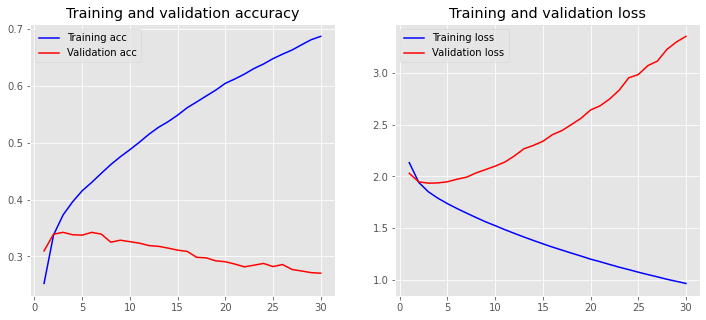

In [25]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

trainable=True actually decreases performance on the validation set.

#### Prediction

In [75]:
dict_inv = dict((v,k) for k,v in tokenizer.word_index.items())
x_decoded = [dict_inv[v] for v in dict_inv]
print(x_decoded)

['i', 'to', 'the', 'a', 'my', 'and', 'you', 'it', 'is', 'in', 'for', 'of', 'me', 'on', 'have', 'so', 'that', 'but', 'just', "i'm", 'day', 'with', 'be', 'at', 'not', 'was', 'this', 'all', 'good', 'now', 'out', 'up', 'get', 'are', 'no', 'like', 'http', 'quot', 'go', 'love', 'do', "it's", 'your', 'work', 'too', 'today', 'got', 'going', 'happy', 'lol', 'from', 'one', 'time', 'u', 'know', 'back', 'im', 'what', 'com', 'will', 'really', 'we', "don't", 'about', 'am', 'its', 'see', 'there', 'some', 'can', 'amp', "can't", 'if', 'night', 'had', 'new', 'thanks', 'home', 'think', '2', 'when', 'well', 'how', 'want', 'still', 'as', 'oh', 'off', 'they', 'more', 'here', 'miss', 'much', 'an', 'great', 'need', 'morning', 'last', 'has', 'haha', 'hope', 'her', 'feel', 'twitter', 'then', 'been', 'fun', 'only', '3', 'why', 'or', 'sad', 'again', 'wish', 'sorry', 'tomorrow', 'would', 'bad', 'tonight', 'right', 'he', 'nice', 'make', 'did', "i'll", 'she', 'by', 'very', 'them', 'yeah', 'though', "that's", 'week',

In [70]:
y_pred = model.predict(np.array([X_test[0]]), verbose=1)
y_pred.shape

1/1 [==============================] - 0s 8ms/step


(1, 13)

In [90]:
predicted = "I can't get this predict thing to work."
predicted = tokenizer.texts_to_sequences([predicted])
predicted = pad_sequences(predicted, padding='post', maxlen=len(predicted))
print(predicted.shape)
y_pred = model.predict([np.array(predicted)], verbose=1)
y_pred

(1, 1)
1/1 [==============================] - 0s 1ms/step


array([[2.1677049e-15, 3.5152029e-16, 1.9414483e-02, 3.2965397e-06,
        4.0833174e-07, 2.5171746e-04, 2.6130351e-08, 5.0067259e-03,
        9.3458283e-01, 7.3178831e-05, 2.9363533e-05, 1.1147569e-04,
        4.0526468e-02]], dtype=float32)

In [113]:
def predict_emo(text):
    predicted = tokenizer.texts_to_sequences([text])
    predicted = pad_sequences(predicted, padding='post', maxlen=maxlen)
    y_pred = model.predict([np.array(predicted)], verbose=1)
    print(y_pred)
    print(y_pred.max())
    print( np.where(y_pred == y_pred.max()) )
    return np.argmax(y_pred)

predict_emo("I am so tired")

1/1 [==============================] - 0s 2ms/step
[[1.3962858e-04 5.0393688e-03 1.3780720e-02 3.4296650e-03 7.5117410e-03
  3.8204268e-02 1.6365398e-02 1.0108446e-02 1.3136578e-01 1.5183128e-02
  2.3694851e-01 4.6242081e-02 4.7568122e-01]]
0.47568122
(array([0]), array([12]))


12

In [64]:
y_pred = model.predict(X_test, verbose=1)
y_pred.shape

313/313 [==============================] - 3s 10ms/step


(10000, 13)

In [66]:
from sklearn.metrics import classification_report

print( dataEF['sentiment'].shape )
print(classification_report(y_test, y_pred.argmax(1)))

(40000,)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.00      0.00      0.00        44
           2       0.00      0.00      0.00       203
           3       0.00      0.00      0.00       202
           4       0.00      0.00      0.00       450
           5       0.25      0.27      0.26      1290
           6       0.33      0.02      0.04       340
           7       0.29      0.35      0.31       949
           8       0.34      0.50      0.41      2166
           9       0.00      0.00      0.00       382
          10       0.24      0.03      0.06      1296
          11       0.10      0.00      0.01       549
          12       0.28      0.54      0.37      2102

    accuracy                           0.30     10000
   macro avg       0.14      0.13      0.11     10000
weighted avg       0.24      0.30      0.24     10000



## Convolutional Neural Networks (CNN)

We now add a Conv1D layer:

In [26]:
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(13, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 100)          4001100   
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 128)           64128     
_________________________________________________________________
global_max_pooling1d_3 (Glob (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 13)                1677      
_________________________________________________________________
dense_9 (Dense)              (None, 13)                182       
Total params: 4,067,087
Trainable params: 4,067,087
Non-trainable params: 0
_________________________________________________________________


Epoch 1/30
3000/3000 [==============================] - 251s 84ms/step - loss: 1.9730 - accuracy: 0.3213 - val_loss: 1.9036 - val_accuracy: 0.3460
Epoch 2/30
3000/3000 [==============================] - 253s 84ms/step - loss: 1.7655 - accuracy: 0.3990 - val_loss: 1.9217 - val_accuracy: 0.3479
Epoch 3/30
3000/3000 [==============================] - 254s 85ms/step - loss: 1.5308 - accuracy: 0.4807 - val_loss: 2.0373 - val_accuracy: 0.3349
Epoch 4/30
3000/3000 [==============================] - 253s 84ms/step - loss: 1.2117 - accuracy: 0.5977 - val_loss: 2.3248 - val_accuracy: 0.3182
Epoch 5/30
3000/3000 [==============================] - 253s 84ms/step - loss: 0.8636 - accuracy: 0.7260 - val_loss: 2.7496 - val_accuracy: 0.2811
Epoch 6/30
3000/3000 [==============================] - 253s 84ms/step - loss: 0.5859 - accuracy: 0.8208 - val_loss: 3.4864 - val_accuracy: 0.2902
Epoch 7/30
3000/3000 [==============================] - 254s 85ms/step - loss: 0.4145 - accuracy: 0.8749 - val_loss: 4

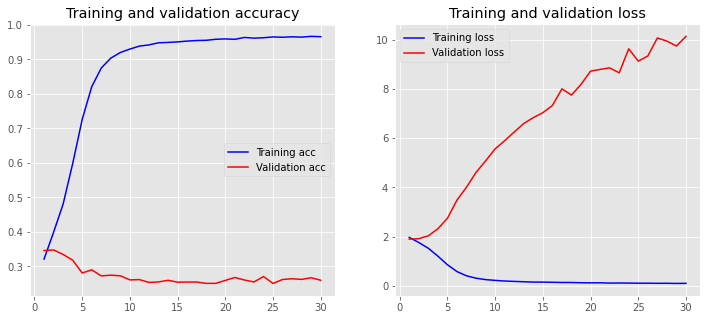

In [27]:
history = model.fit(X_train, y_train,
                    epochs=30,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=10)
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)


CNN is actually worse than pretrained word embedding on our validation set.